# sources

- [pinterest palette](https://www.pinterest.com/pin/585116176623557620/)
- [graphic designer](https://www.youtube.com/shorts/okKdG81ytIM)
- [color checker website](https://thecolorpalettestudio.com/pages/free-color-contrast-checker)
- [adapting this package](https://github.com/ZugBahnHof/color-contrast/blob/main/color_contrast/contrast.py)

In [ ]:
from PIL import ImageColor

In [ ]:
color_palette = ["#506C60", "#C06145", "#DDBFA7", "#F8E3D2", "#183425"]


def luminance(r, g, b):
    return 0.2126 * r + 0.7152 * g + 0.0722 * b


def contrast_ratio(color1, color2):
    Y1 = luminance(*color1)
    Y2 = luminance(*color2)
    return max(Y1, Y2) / min(Y1, Y2)

In [ ]:
ImageColor.getcolor(color_palette[0], "RGB")

luminance(*ImageColor.getcolor(color_palette[0], "RGB"))


contrast_ratio(
    ImageColor.getcolor(color_palette[1], "RGB"),
    ImageColor.getcolor(color_palette[2], "RGB"),
)

1.6986717649775906

In [33]:
import wcag_contrast_ratio as contrast

black = (0.0, 0.0, 0.0)
white = (1.0, 1.0, 1.0)
contrast.rgb(black, white)

21.0

In [37]:
# taken from https://github.com/ZugBahnHof/color-contrast/blob/main/color_contrast/contrast.py
from colour import Color


def get_luminance(color: Color) -> float:
    """
    Calculate the relative luminance of the supplied color.

    Algorithm taken from https://www.w3.org/TR/WCAG21/#dfn-relative-luminance

    :param color: the color to get the luminance from
    :type color: Color
    :return: Luminance value
    :rtype: float
    """

    RsRGB, GsRGB, BsRGB = color.get_rgb()

    R = RsRGB / 12.92 if RsRGB <= 0.04045 else ((RsRGB + 0.055) / 1.055) ** 2.4
    G = GsRGB / 12.92 if GsRGB <= 0.04045 else ((GsRGB + 0.055) / 1.055) ** 2.4
    B = BsRGB / 12.92 if BsRGB <= 0.04045 else ((BsRGB + 0.055) / 1.055) ** 2.4

    luminance = 0.2126 * R + 0.7152 * G + 0.0722 * B

    return luminance


get_luminance(Color(color_palette[0]))

0.1327512576835677

In [ ]:
def get_contrast_ratio(color1: Color, color2: Color) -> float:
    """
    Calculate the contrast ratio between two colors.

    Algorithm taken from https://www.w3.org/TR/WCAG21/#dfn-contrast-ratio

    :param color1: the first color
    :type color1: Color
    :param color2: the second color
    :type color2: Color
    :return: Contrast ratio
    :rtype: float
    """

    L1 = get_luminance(color1)
    L2 = get_luminance(color2)

    # if L1 > L2:
    #     L1, L2 = L2, L1

    ratio = (L1 + 0.05) / (L2 + 0.05)
    ratio_i = (L2 + 0.05) / (L1 + 0.05)

    return round(max(ratio, ratio_i), 2)


get_contrast_ratio(Color(color_palette[0]), Color(color_palette[4]))

2.35

In [51]:
color_palette = ["#506C60", "#C06145", "#DDBFA7", "#F8E3D2", "#183425"]

AccessibilityLevel = {
    "AA": 4.5,
    "AAA": 7.0,
    "AA Large": 3.0,
    "AAA Large": 4.5,
}

In [52]:
import itertools


combinations = list(itertools.combinations(color_palette, 2))
print(combinations)

[('#506C60', '#C06145'), ('#506C60', '#DDBFA7'), ('#506C60', '#F8E3D2'), ('#506C60', '#183425'), ('#C06145', '#DDBFA7'), ('#C06145', '#F8E3D2'), ('#C06145', '#183425'), ('#DDBFA7', '#F8E3D2'), ('#DDBFA7', '#183425'), ('#F8E3D2', '#183425')]


In [55]:
for color1, color2 in combinations:
    contrast_ratio = get_contrast_ratio(Color(color1), Color(color2))
    print(f"Contrast ratio between {color1} and {color2}: {contrast_ratio}")
    for level, ratio in AccessibilityLevel.items():
        if contrast_ratio >= ratio:
            print(f"Contrast ratio between {color1} and {color2} is {level} compliant")
            break
    else:
        print(f"Contrast ratio between {color1} and {color2} is not compliant")

Contrast ratio between #506C60 and #C06145: 1.38
Contrast ratio between #506C60 and #C06145 is not compliant
Contrast ratio between #506C60 and #DDBFA7: 3.31
Contrast ratio between #506C60 and #DDBFA7 is AA Large compliant
Contrast ratio between #506C60 and #F8E3D2: 4.63
Contrast ratio between #506C60 and #F8E3D2 is AA compliant
Contrast ratio between #506C60 and #183425: 2.35
Contrast ratio between #506C60 and #183425 is not compliant
Contrast ratio between #C06145 and #DDBFA7: 2.4
Contrast ratio between #C06145 and #DDBFA7 is not compliant
Contrast ratio between #C06145 and #F8E3D2: 3.36
Contrast ratio between #C06145 and #F8E3D2 is AA Large compliant
Contrast ratio between #C06145 and #183425: 3.24
Contrast ratio between #C06145 and #183425 is AA Large compliant
Contrast ratio between #DDBFA7 and #F8E3D2: 1.4
Contrast ratio between #DDBFA7 and #F8E3D2 is not compliant
Contrast ratio between #DDBFA7 and #183425: 7.76
Contrast ratio between #DDBFA7 and #183425 is AA compliant
Contrast

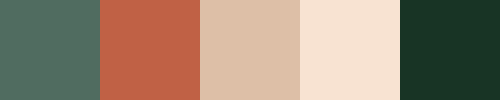

In [69]:
from PIL import Image
from PIL import ImageDraw

color_palette = ["#506C60", "#C06145", "#DDBFA7", "#F8E3D2", "#183425"]

images = [
    Image.new("RGB", (int(500 / len(color_palette)), 100), color=x)
    for x in color_palette
]

new_im = Image.new("RGB", (500, 100))

x_offset = 0
for im in images:
    new_im.paste(im, (x_offset, 0))
    x_offset += im.size[0]

new_im